In [39]:
import pandas as pd
import numpy as np 
import seaborn as  sns
import matplotlib.pyplot as plt

In [40]:
df= pd.read_csv(r"D:\Excel R\Data Science Assignments\Linear Regression\Salary_data.csv")

In [41]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Cleaning and Preprocessing

In [42]:
df.shape

(30, 2)

In [88]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [87]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [43]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [63]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [64]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [65]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [66]:
df.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [67]:
df.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [68]:
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [79]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [83]:
df.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

correlation value is greter than 0.85 a strong and postive correlation between x and y 


In [55]:
x=df.YearsExperience
y=df.Salary

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

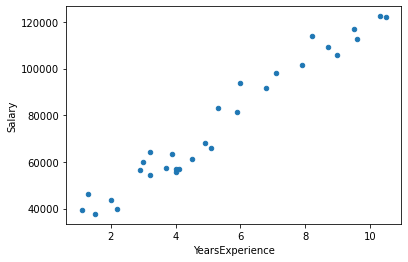

In [46]:
df.plot.scatter(x="YearsExperience",y="Salary")

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

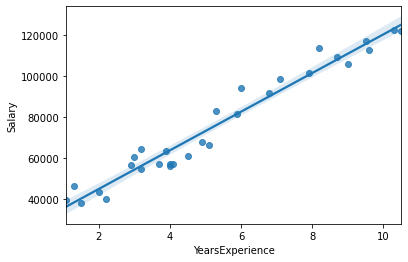

In [47]:
sns.regplot(x="YearsExperience",y="Salary",data=df)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

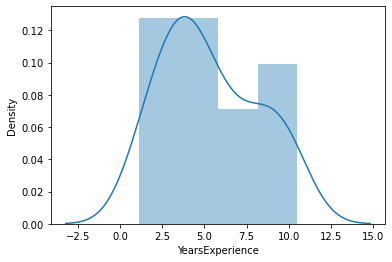

In [69]:
sns.distplot(df['YearsExperience'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

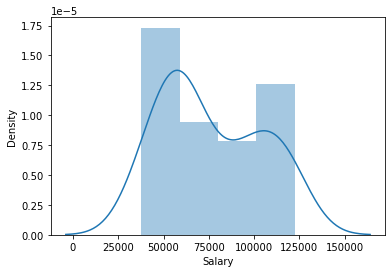

In [71]:
sns.distplot(df['Salary'])

<AxesSubplot:>

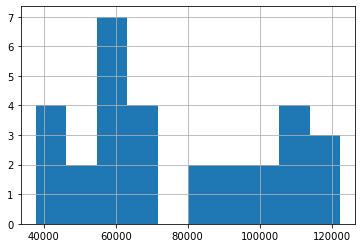

In [72]:
df['Salary'].hist()

<AxesSubplot:>

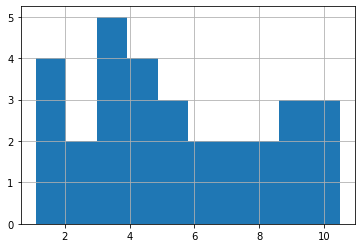

In [74]:
df['YearsExperience'].hist()

In [ ]:
Out Liers Detection

<AxesSubplot:>

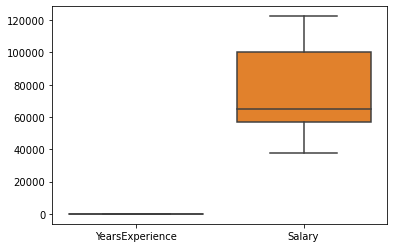

In [81]:
sns.boxplot(data=df)

<AxesSubplot:>

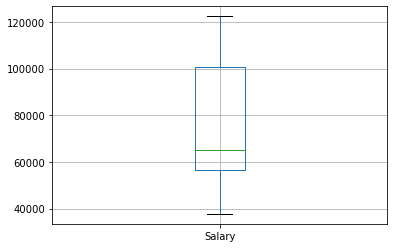

In [76]:
df.boxplot(column=['Salary'])

<AxesSubplot:>

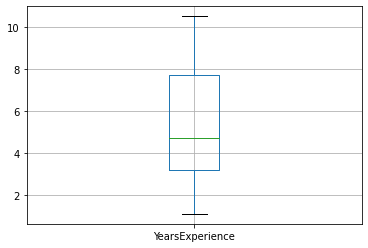

In [77]:
df.boxplot(column=['YearsExperience'])

In [84]:
#Checking the correlation between YearsExp and salary  it was highly correlated the r value is "0.97"
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
#Model Creation OLS Ordinary  Least Squares Method 

In [48]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=df).fit()

In [89]:
model

In [90]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [91]:
model.summary() ## Total Summary of the Model including p, t  values parameters


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.14e-20
Time:                        13:30:23   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
print(model.pvalues)

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [95]:
print(model.tvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64


# Prediciting the Salary Hike


In [102]:
pre_data=model.predict(y)
pre_data

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [117]:
pre_data.mean()

5.313333333333332

Errors ==> actual values - predicted values

In [103]:
error= df.iloc[:,0]-pre_data
error

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [104]:
## R^2 precenteage of variation  in dependent variable (x)==> Coffient of Determination
model.rsquared

0.9569566641435086

In [107]:
model.rsquared_adj

0.9554194021486339

Metrics

In [109]:
from sklearn.metrics import mean_squared_error
from math import  sqrt 

In [114]:
#MSE ==> Mean Squared Error  > it say's how close a regression line to the data points
mse=mean_squared_error(df.Salary,pre_data)
mse

6502000509.014902

In [116]:
#RMSE
rmse= sqrt(mse)
rmse

80634.98315876863

# Transformations

In [127]:
#log
rkd=np.log10(df['YearsExperience'])
rkd1=np.log10(df['Salary'])
rkn=pd.DataFrame(data=(rkd,rkd1))
rkn

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,0.041393,0.113943,0.176091,0.301030,0.342423,0.462398,0.477121,0.505150,0.505150,0.568202,...,0.832509,0.851258,0.897627,0.913814,0.939519,0.954243,0.977724,0.982271,1.012837,1.021189
Salary,4.594867,4.664689,4.576698,4.638739,4.600875,4.753139,4.779236,4.735958,4.809189,4.757313,...,4.962549,4.992434,5.005618,5.056188,5.039140,5.023590,5.068071,5.051673,5.087749,5.085904


In [132]:
skn=rkn.transpose()
skn.head(5)

,YearsExperience,Salary
0,0.041393,4.594867
1,0.113943,4.664689
2,0.176091,4.576698
3,0.301030,4.638739
4,0.342423,4.600875


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

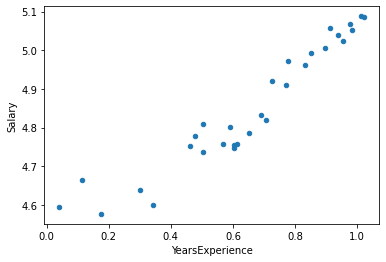

In [133]:
skn.plot.scatter(x='YearsExperience',y='Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

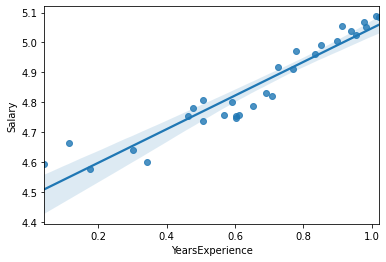

In [134]:
sns.regplot(x='YearsExperience',y='Salary',data=skn)

In [136]:
#Sqrt
sqtdata1=np.sqrt(df['YearsExperience'])
sqtdata2=np.sqrt(df['Salary'])
sqtdata3=pd.DataFrame(data=(sqtdata1,sqtdata2))
sqtdata3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,1.048809,1.140175,1.224745,1.414214,1.483240,1.702939,1.732051,1.788854,1.788854,1.923538,...,2.607681,2.664583,2.810694,2.863564,2.949576,3.000000,3.082207,3.098387,3.209361,3.240370
Salary,198.350700,214.953483,194.244691,208.626460,199.727314,237.995798,245.254969,233.334524,253.860198,239.142217,...,302.882816,313.485247,318.279751,337.360341,330.803567,324.933839,342.007310,335.611382,349.844251,349.101704


In [140]:
sqrtdata=sqtdata3.transpose()
sqrtdata.head(3)

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

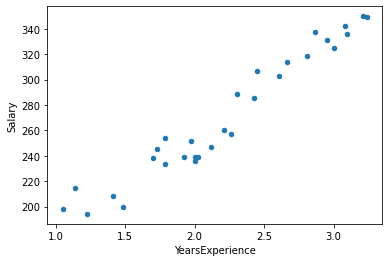

In [142]:
sqrtdata.plot.scatter(x="YearsExperience",y="Salary")


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

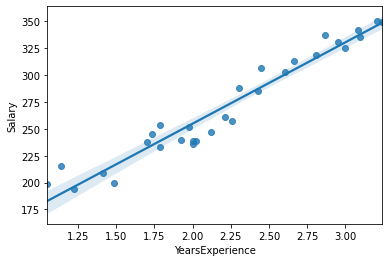

In [143]:
sns.regplot(x="YearsExperience",y="Salary",data=sqrtdata)

In [151]:
#exp
dataexp1=np.exp(df['YearsExperience'])
dataexp2=(df['Salary'])
dataexp3=pd.DataFrame(data=(dataexp1,dataexp2))
dataexp3.head(5)
dataexp3=dataexp3.transpose()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

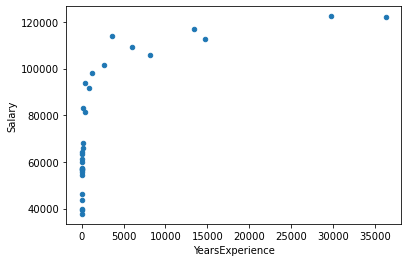

In [152]:
dataexp3.plot.scatter(x="YearsExperience",y="Salary")

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

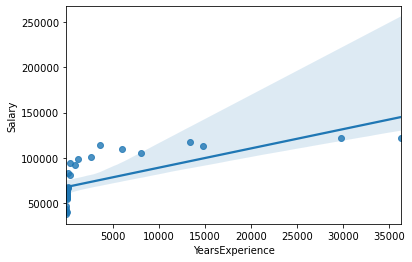

In [153]:
sns.regplot(x="YearsExperience",y="Salary",data=dataexp3)

In [154]:
ddiv1=1/(df['YearsExperience'])
ddiv2=1/(df['Salary'])
ddiv3=pd.DataFrame(data=(ddiv1,ddiv2))

In [159]:
ddiv3=ddiv3.transpose()
ddiv3.head(5)

,YearsExperience,Salary
0,0.909091,0.000025
1,0.769231,0.000022
2,0.666667,0.000027
3,0.500000,0.000023
4,0.454545,0.000025


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

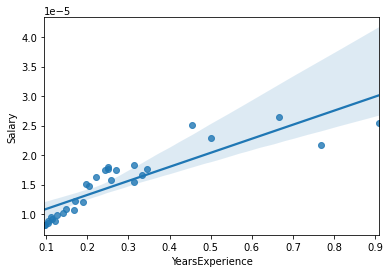

In [160]:
sns.regplot(x='YearsExperience',y='Salary',data=ddiv3)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

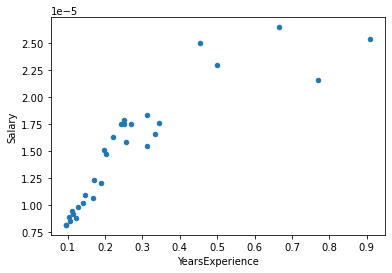

In [163]:
ddiv3.plot.scatter(x='YearsExperience',y='Salary')